In [1]:
import keras
from keras.datasets import mnist
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

Using TensorFlow backend.


### Restore Trained Model

In [2]:
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)
model.load_weights("weights.h5")

### Load data

Keras has a builting function for loading MNIST data while splitting it into train and test sets. x_train and x_test are arrays if train and test input images respectively. Images are represented as a 28 x 28 matrix of pixel values. y_train and y_test are train and test labels respectively.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display later
orig_test = x_test

x_train, x_test = x_train / 255.0, x_test / 255.0

### Make Predictions

Use the trained model to make predictions on data that it was not trained on.
Notice that prediction takes much less time compared with training.

Keras can make predictions for a set of test data, rather than just one sample. In this case, the model is used to make predictions for all of the test data in one statement. Keras/Tensorflow will parallelize this operation as much as possible when using a GPU.

The predicted output is a one-hot vector. argmax() is used to translate the output vector to a scalar value by choosing the index of the vector with the highest value.

In [4]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

The following snippet chooses a random test image, prints the model predicted value, expected value (label), and the original image.

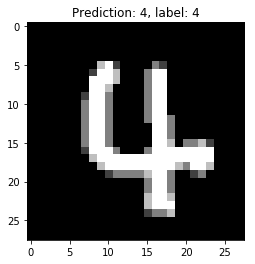

In [5]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

### Error Analysis

The next snippet looks for model predictions that specifically do not match the expected value. In some cases, even humans might disagree on what this image is.

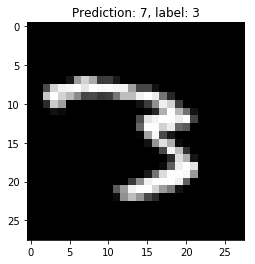

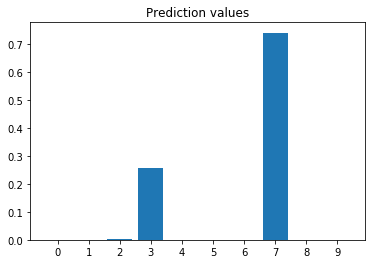

In [6]:

for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

The following cell calculates the error rate by comparing predicted values with expected values. This is similar to what Keras does when evaluating a model.

In [7]:
total = 0.0
misclassified = 0.0
for i in range(10000):
    total += 1
    if most_likely[i] != y_test[i]:
        misclassified += 1
print('Error rate: %.2f %%' % (100.0*misclassified/total))

Error rate: 1.68 %
